# Advanced Data Visualization

In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

In [ ]:
!pip install xlrd

In [ ]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
df_can.shape

(195, 43)

In [ ]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [ ]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
# clean up the dataset to remove unnecessary columns
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# rename columns for better clarity
df_can.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)

# convert all column labels to string type
df_can.columns = list(map(str, df_can.columns))

# set 'Country' as index
df_can.set_index('Country', inplace=True)

# define the years to use (ensure they are all string type)
years = list(map(str, range(1980, 2014)))

# convert year columns to numeric (if needed)
df_can[years] = df_can[years].apply(pd.to_numeric, errors='coerce')

# add 'Total' column by summing over the years only
df_can['Total'] = df_can[years].sum(axis=1)

# check result
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [ ]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## Waffle Chart

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.10.0


In [ ]:
# let's create a new dataframe for these three countries
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


**Langkah 1**. Langkah pertama dalam membuat bagan wafel adalah menentukan proporsi setiap kategori terhadap total.

In [ ]:
# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


**Langkah 2**. Langkah kedua adalah menentukan ukuran keseluruhan grafik waffle.

In [ ]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


**Langkah 3**. Langkah ketiga adalah menggunakan proporsi setiap kategori untuk menentukan jumlah ubinnya masing-masing

In [ ]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


Berdasarkan proporsi yang dihitung, Denmark akan menempati 129 petak grafik waffle, Norwegia akan menempati 77 petak, dan Swedia akan menempati 194 petak.

**Langkah 4**. Langkah keempat adalah membuat matriks yang menyerupai waffle chart dan mengisinya.

In [ ]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

In [ ]:
# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1

        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

print ('Waffle chart populated!')

Waffle chart populated!


**Langkah 5**. Petakan waffle matriks menjadi visual.

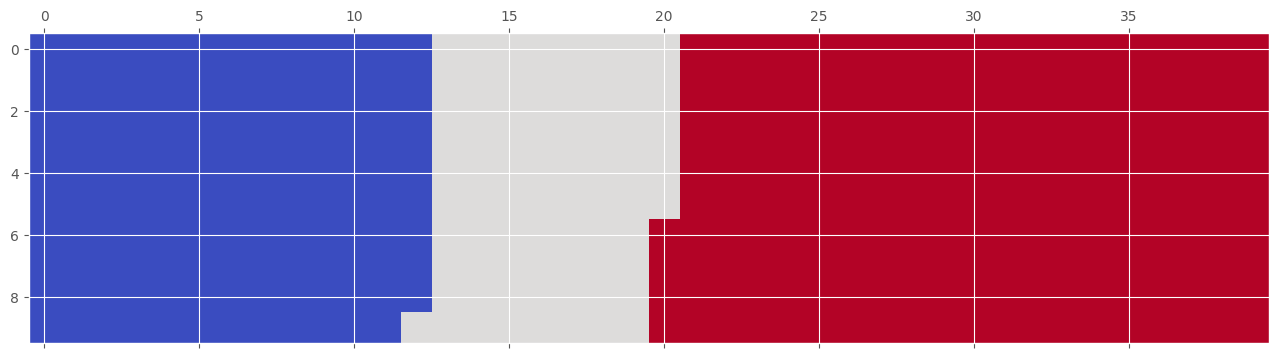

In [ ]:
# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
# plt.colorbar()
plt.show()

**Langkah 6**. Percantik bagan.

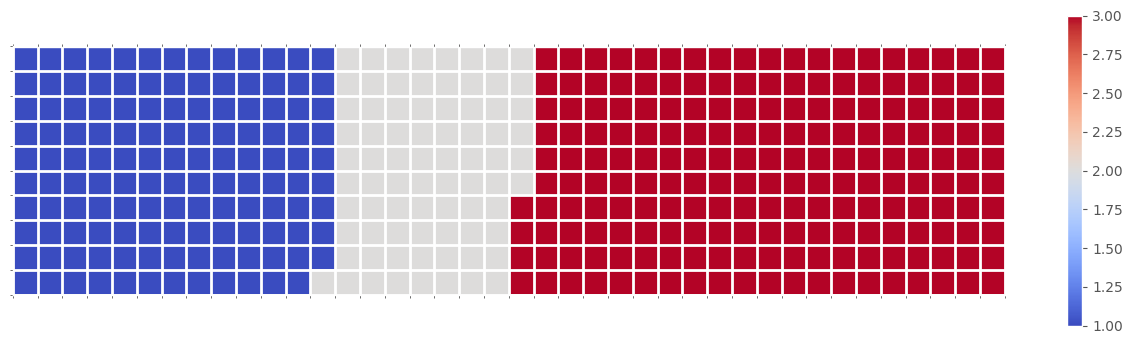

In [ ]:
# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

**Langkah 7**. Buat legenda dan tambahkan ke bagan.

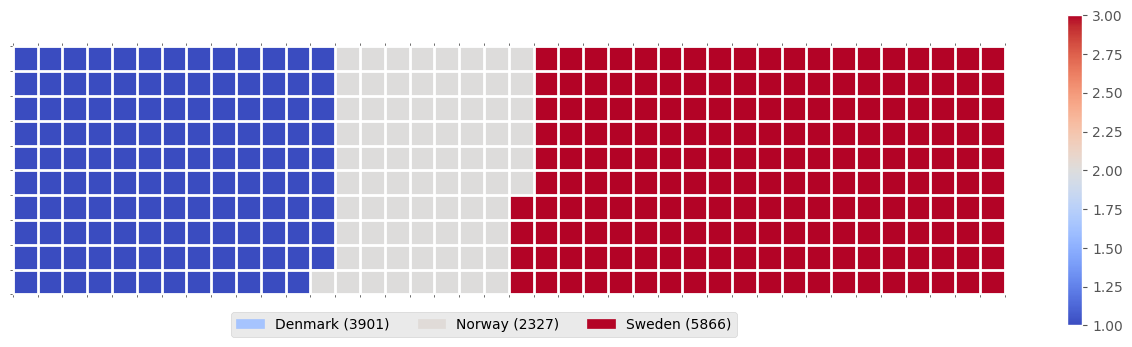

In [ ]:
# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'].values)
total_values = values_cumsum[-1]


# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'].iloc[i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          );

Sekarang akan sangat **tidak efisien** jika kita harus mengulangi tujuh langkah tersebut setiap kali ingin membuat *waffle chart*. Oleh karena itu, mari kita gabungkan semua langkah tersebut ke dalam sebuah **fungsi tunggal** yang bernama `create_waffle_chart`.

Fungsi ini akan menerima parameter-parameter berikut sebagai input:

---

### **Parameter Fungsi `create_waffle_chart`**:

1. **`categories`**:
   Kategori unik atau kelas dalam dataframe.
   Contohnya: nama negara, jenis produk, atau kelompok data lainnya.

2. **`values`**:
   Nilai-nilai yang sesuai dengan masing-masing kategori atau kelas.
   Contohnya: jumlah imigran, populasi, pendapatan, dan sebagainya.

3. **`height`**:
   Tinggi dari waffle chart, dalam jumlah baris pada grid.

4. **`width`**:
   Lebar dari waffle chart, dalam jumlah kolom pada grid.

5. **`colormap`**:
   Skema warna yang digunakan untuk membedakan kategori.
   Biasanya berupa objek colormap dari Matplotlib, seperti `plt.cm.coolwarm`.

6. **`value_sign`** *(opsional)*:
   Tanda atau simbol yang menyertai nilai, seperti `%`, `$`, dan sebagainya.
   Nilai default-nya adalah string kosong (`''`) agar fungsi dapat digunakan secara fleksibel untuk berbagai jenis data.


In [ ]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)

    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))

    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1

            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index



    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values.values)
    #total_values = values_cumsum[len(values_cumsum) - 1]
    total_values = values_cumsum[-1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values.iloc[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values.iloc[i]) + ')'

        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [ ]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


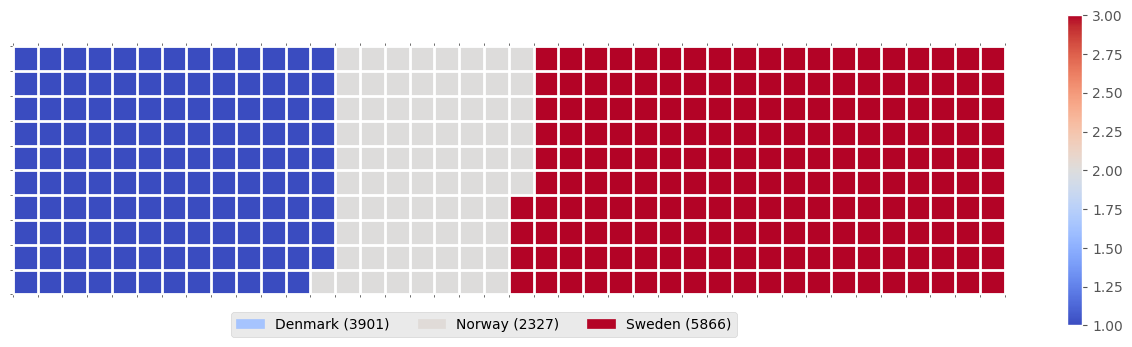

In [ ]:
create_waffle_chart(categories, values, height, width, colormap)

## Word Cloud

In [ ]:
!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [ ]:
# download file and save as alice_novel.txt
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()

print ('File downloaded and saved!')

File downloaded and saved!


**Stopword** adalah kata-kata umum dalam suatu bahasa yang biasanya tidak memiliki makna penting dalam analisis teks, sehingga sering dihapus (di-filter) saat melakukan pemrosesan teks seperti dalam Natural Language Processing (NLP).

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

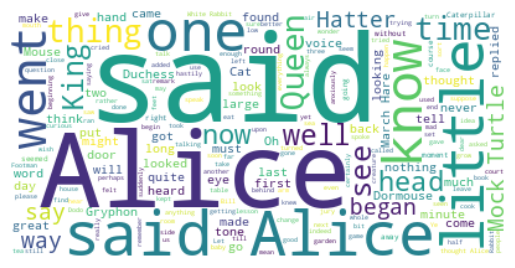

In [ ]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

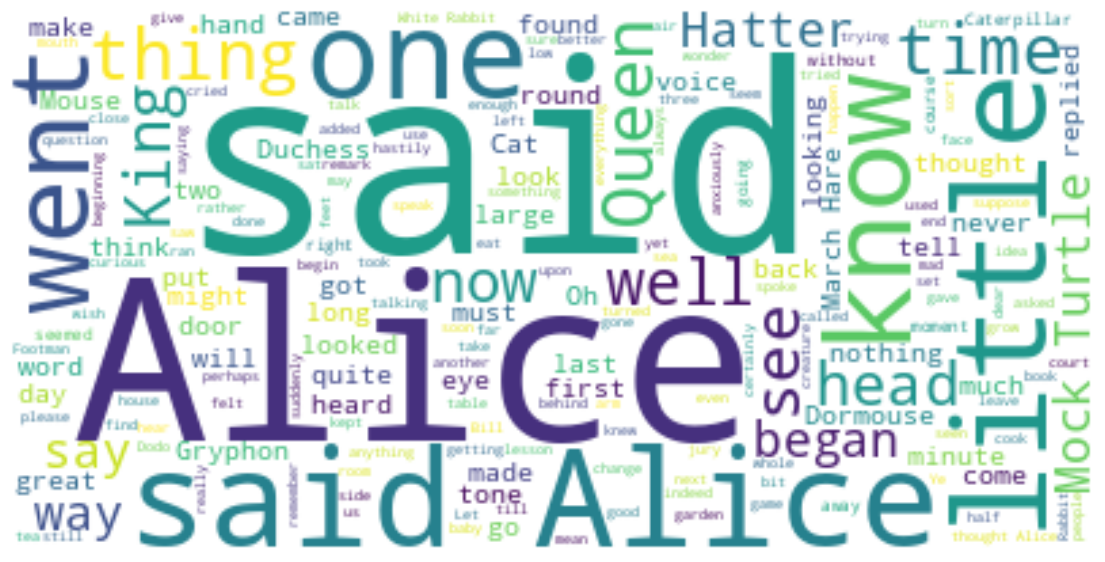

In [ ]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

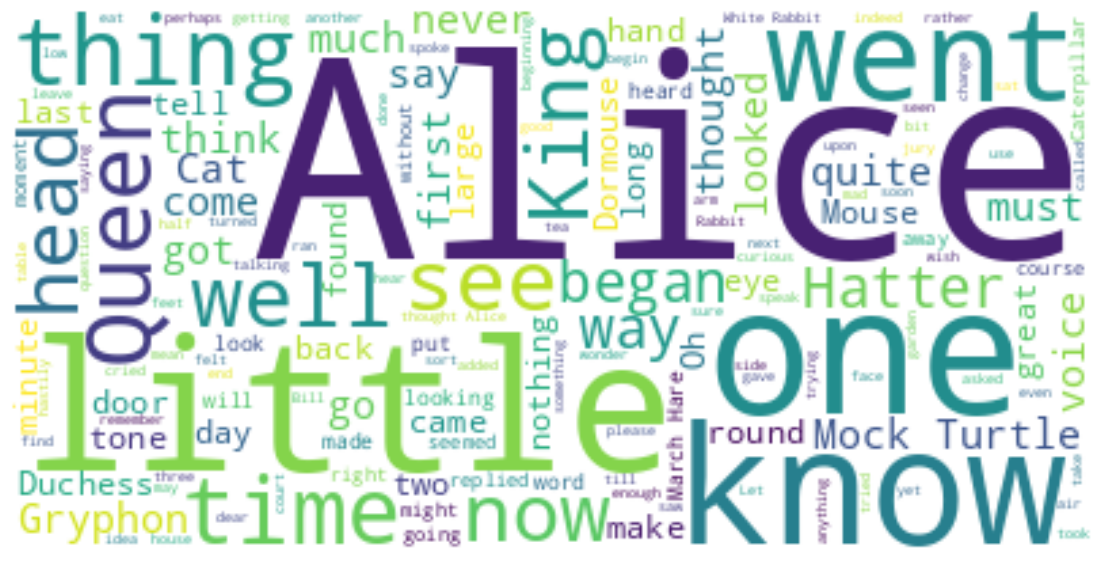

In [ ]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Agar lebih menarik kita dapat mengubah bentuk dari word cloud tersebut dengan menambahkan mask.

In [ ]:
# download image
!wget --quiet https://github.com/ardhiraka/PFDS_sources/raw/master/alice_mask.png -O alice_mask.png

# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))

print('Image downloaded and saved!')

Image downloaded and saved!


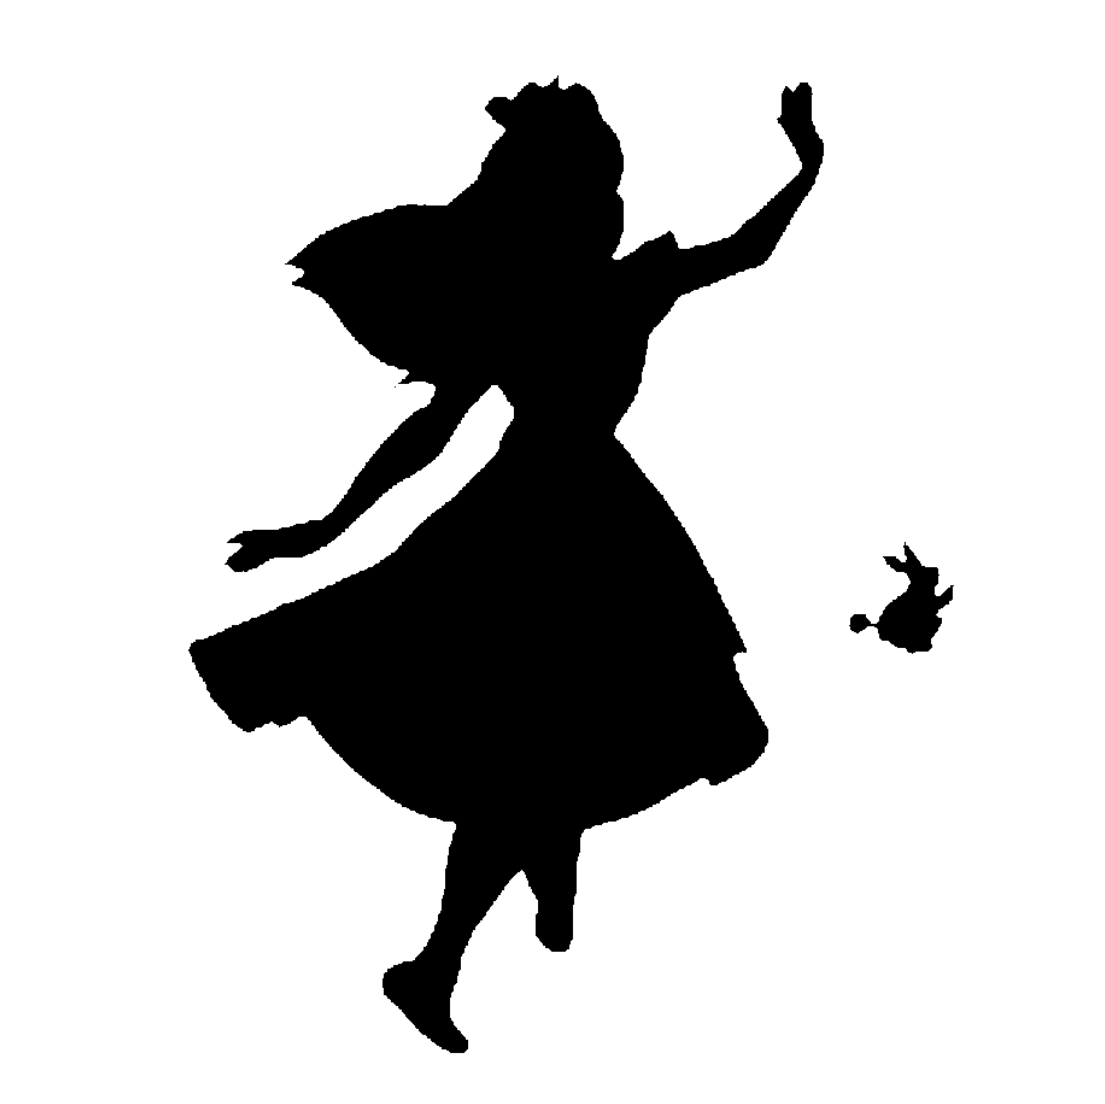

In [ ]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

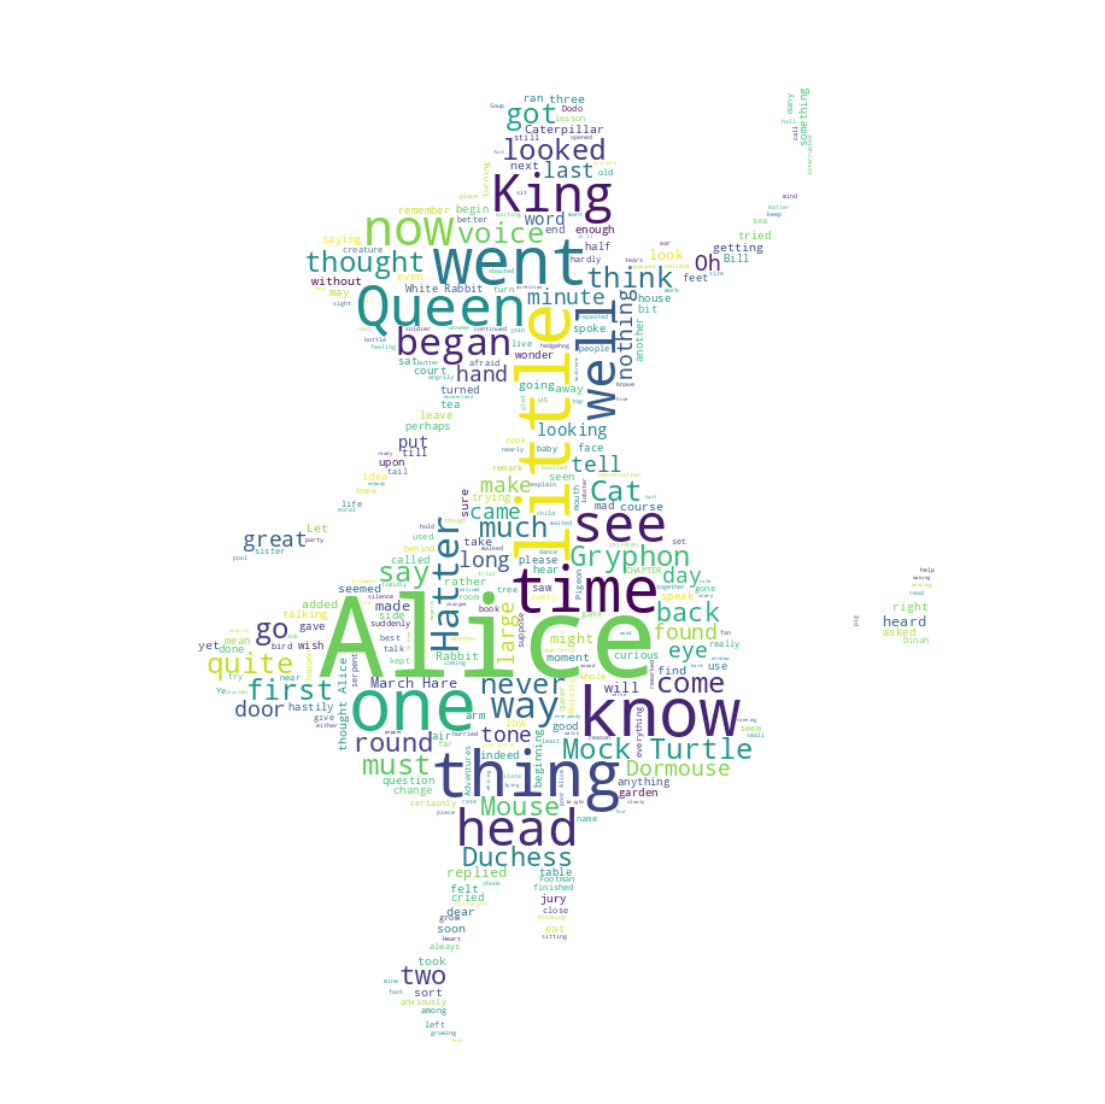

In [ ]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Word cloud Pada Data Imigran

In [ ]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
total_immigration = df_can['Total'].sum()
total_immigration

np.int64(6409153)

In [ ]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [ ]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


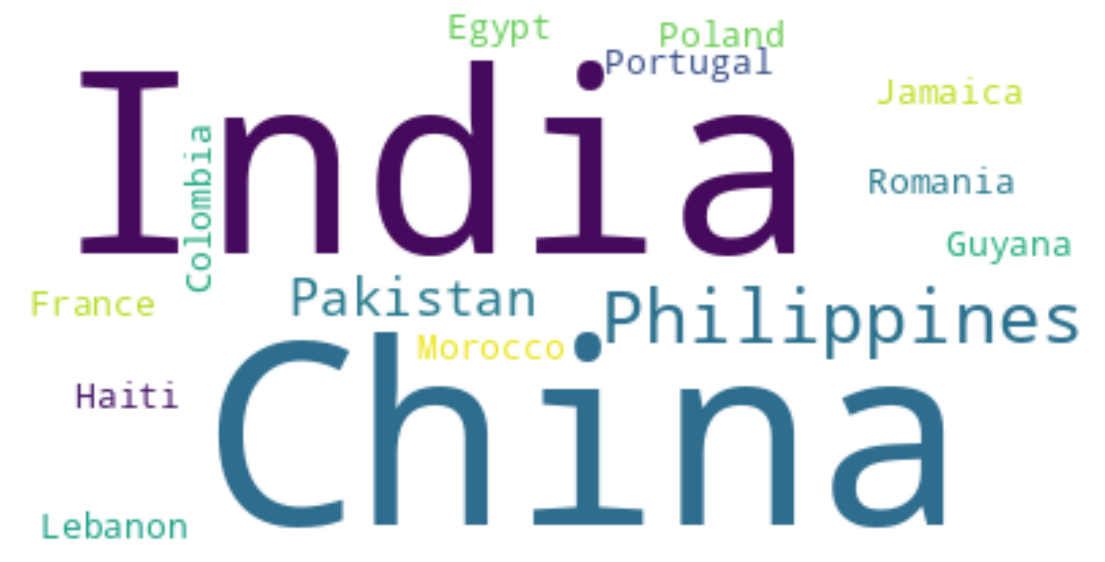

In [ ]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#3 Membuat Map dengan Folium

In [ ]:
!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [ ]:
world_map= folium.Map()
world_map

In [ ]:
# define the world map centered around Semarang with a low zoom level
latitude = -6.992620
longitude = 110.428009
world_map = folium.Map(location=[latitude, longitude], zoom_start=8)

# display world map
world_map

In [ ]:
# define the world map centered around Semarang with a higher zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=30)

# display world map
world_map

Sekarang kita coba ganti tiles yang defaultnya ada 'OpenStreetMap' menjadi menjadi 'OpenTopoMap'

In [ ]:
latitude = -6.992620
longitude = 110.428009
world_map = folium.Map(location=[latitude, longitude], zoom_start=30, tiles='OpenTopoMap')

# display map
world_map

### Maps with Marker

In [ ]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


Data tersebut merupakan Data macam-macam Kejahatan di kota San Francisco, Amerika Serikat.

Setiap baris dalam dataset ini terdiri dari **13 fitur**, yaitu:

1. **IncidntNum**
   → Nomor insiden (ID unik untuk setiap kejadian).

2. **Category**
   → Kategori atau jenis kejahatan/insiden (misalnya: pencurian, penyerangan, dll).

3. **Descript**
   → Deskripsi lebih detail tentang kejahatan atau insiden tersebut.

4. **DayOfWeek**
   → Hari dalam seminggu saat kejadian itu terjadi (misalnya: Senin, Selasa, dll).

5. **Date**
   → Tanggal terjadinya kejadian.

6. **Time**
   → Waktu kejadian berlangsung (jam dan menit).

7. **PdDistrict**
   → Nama distrik kepolisian tempat kejadian dilaporkan atau ditangani.

8. **Resolution**
   → Hasil atau penyelesaian dari kasus tersebut (misalnya: pelaku ditangkap atau kasus belum diselesaikan).

9. **Address**
   → Alamat atau lokasi terdekat dari tempat kejadian.

10. **X**
    → Nilai longitude (garis bujur) lokasi kejadian.

11. **Y**
    → Nilai latitude (garis lintang) lokasi kejadian.

12. **Location**
    → Tuple (pasangan) dari nilai latitude dan longitude lokasi kejadian. Biasanya berbentuk `(Y, X)`.

13. **PdId**
    → ID dari kepolisian yang menangani insiden tersebut.



In [ ]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [ ]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

Sekarang setelah kita sedikit mengurangi datanya, mari kita visualisasikan dimana kejahatan terjadi di kota San Francisco. Kita akan menggunakan gaya default dan kita akan menginisialisasi tingkat zoom ke 12.



In [ ]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [ ]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

Sekarang mari kita taruh lokasi kejahatan ke dalam peta. Cara untuk melakukannya di Folium adalah dengan membuat feature group, lalu menambahkannya ke sanfran_map.

In [ ]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

Kalian juga dapat menambahkan beberapa teks pop-up yang akan ditampilkan saat kalian mengarahkan kursor ke atas marker. Mari buat setiap penanda menampilkan kategori kejahatan saat diarahkan ke atas marker.

In [ ]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

# add incidents to map
sanfran_map.add_child(incidents)

Dari Map tersebut, sekarang kita dapat mengetahui kategori kejahatan apa yang terjadi di setiap marker.

Jika kalian menyadari peta menjadi sangat padat karena memiliki banyak marker atau tanda.  Untuk menghindari hal tersebut, salah satu solusinya adalah dengan **mengelompokkan marker ke dalam cluster** yang berbeda.

Setiap cluster kemudian diwakili oleh jumlah kejahatan di setiap lingkungan. Cluster ini dapat dianggap sebagai kantong dari kejahatan San Francisco yang kemudian dapat kalian analisis secara terpisah.

Untuk mengimplementasikannya, kita mulai dengan membuat instance objek MarkerCluster dan menambahkan semua titik data di dataframe ke objek ini.



In [ ]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

Perhatikan bagaimana saat kalian memperkecil sepenuhnya, semua marker dikelompokkan ke dalam satu cluster, cluster global, dari 100 marker atau jumlah total kejahatan dalam dataframe kita. Setelah kalian mulai memperbesar, cluster global akan mulai dibagi menjadi beberapa cluster yang lebih kecil. Memperbesar sepenuhnya akan menghasilkan marker individual.

## Choropleth Maps



**Peta Choropleth** adalah peta tematik di mana wilayah-wilayah diwarnai atau diberi pola sesuai dengan nilai dari variabel statistik yang ditampilkan pada peta, seperti **kepadatan penduduk** atau **pendapatan per kapita**.

Peta choropleth memberikan cara yang mudah untuk memvisualisasikan bagaimana suatu pengukuran bervariasi di seluruh wilayah geografis, atau untuk menunjukkan tingkat variasi di dalam suatu daerah.

Di bawah ini adalah contoh **peta Choropleth Amerika Serikat** yang menggambarkan **jumlah penduduk per mil persegi di tiap negara bagian**:

<img src = "https://ibm.box.com/shared/static/2kzaknzdf6crt3n5rx6haskg3wiaklxl.png" width = 600>



In [ ]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add 'Total' column by summing over the years only
df_can['Total'] = df_can[years].sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 39)


Untuk membuat sebuah peta Choropleth, kita memerlukan file GeoJSON yang mendefinisikan batas-batas wilayah seperti negara bagian, kabupaten, atau negara yang ingin kita tampilkan.

Dalam kasus ini, karena kita ingin membuat peta dunia, maka kita membutuhkan file GeoJSON yang berisi batas-batas semua negara di dunia.

Untuk mempermudah, file ini biasanya sudah disediakan dalam format siap pakai, dan bisa kamu unduh atau gunakan langsung. Mari kita beri nama file tersebut: **world_countries.json**

In [ ]:
# download countries geojson file
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json

print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [ ]:
world_geo = r'world_countries.json'  # GeoJSON file

# Create a blank world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Add Choropleth layer to the map
choropleth = folium.Choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',  # Color scale: Yellow - Orange - Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada',
)

# Add the choropleth to the map
choropleth.add_to(world_map)

# Display the map
world_map


Wow! Peta yang sangat menarik. Berdasarkan legend pada peta Choropleth kita, semakin gelap warna suatu negara dan semakin mendekati warna merah, maka semakin tinggi jumlah imigran dari negara tersebut. Dengan demikian, imigrasi tertinggi selama 33 tahun (dari tahun 1980 hingga 2013) berasal dari Tiongkok, India, dan Filipina, diikuti oleh Polandia, Pakistan, dan yang cukup menarik, Amerika Serikat.
